In [46]:
import torch
import torch.nn as nn 
from torch.optim import Adam 

from torch.distributions.uniform import Uniform

from torch.utils.data import DataLoader,TensorDataset

import lightning as L

import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 



In [47]:
# we will need to encode the number and names in the token and then create one hot encoding where the target word is 1 and rest everything is 0 

# we will create embeddings for Troll2 is great Gymkata and each time we have a word we put it 1 

input = torch.tensor([[1.,0.,0.,0.],
                     [0.,1.,0.,0.],
                     [0.,0.,1.,0.],
                     [0.,0.,0.,1.]])


labels = torch.tensor([[0.,1.,0.,0.],
                     [0.,0.,1.,0.],
                     [0.,0.,0.,1.],
                     [0.,1.,0.,0.]])


Dataset = TensorDataset(input,labels)

meradata = DataLoader(Dataset)


In [48]:
from typing import Any


class Wordembedding(L.LightningModule):
    # we need to select distributions from which we can select values in 
    def __init__(self):
        super().__init__()
        # we need to set a range of min and max distribution 
        
        min_value = -0.5
        max_value = 0.5
        
        self.input1_w1 =  nn.Parameter(Uniform(min_value,max_value).sample()) # this will uniformly select values from -0.5 to 0.5 for the values 
        self.input1_w2 =  nn.Parameter(Uniform(min_value,max_value).sample()) # this will uniformly select values from -0.5 to 0.5 for the values 
        self.input2_w1 =  nn.Parameter(Uniform(min_value,max_value).sample()) # this will uniformly select values from -0.5 to 0.5 for the values 
        self.input2_w2 =  nn.Parameter(Uniform(min_value,max_value).sample()) # this will uniformly select values from -0.5 to 0.5 for the values 
        self.input3_w1 =  nn.Parameter(Uniform(min_value,max_value).sample()) # this will uniformly select values from -0.5 to 0.5 for the values 
        self.input3_w2 =  nn.Parameter(Uniform(min_value,max_value).sample()) # this will uniformly select values from -0.5 to 0.5 for the values 
        self.input4_w1 =  nn.Parameter(Uniform(min_value,max_value).sample()) # this will uniformly select values from -0.5 to 0.5 for the values 
        self.input4_w2 =  nn.Parameter(Uniform(min_value,max_value).sample()) # this will uniformly select values from -0.5 to 0.5 for the values 

        self.output1_w1 =  nn.Parameter(Uniform(min_value,max_value).sample()) # this will uniformly select values from -0.5 to 0.5 for the values 
        self.output1_w2 =  nn.Parameter(Uniform(min_value,max_value).sample()) # this will uniformly select values from -0.5 to 0.5 for the values 
        self.output2_w1 =  nn.Parameter(Uniform(min_value,max_value).sample()) # this will uniformly select values from -0.5 to 0.5 for the values 
        self.output2_w2 =  nn.Parameter(Uniform(min_value,max_value).sample()) # this will uniformly select values from -0.5 to 0.5 for the values 
        self.output3_w1 =  nn.Parameter(Uniform(min_value,max_value).sample()) # this will uniformly select values from -0.5 to 0.5 for the values 
        self.output3_w2 =  nn.Parameter(Uniform(min_value,max_value).sample()) # this will uniformly select values from -0.5 to 0.5 for the values 
        self.output4_w1 =  nn.Parameter(Uniform(min_value,max_value).sample()) # this will uniformly select values from -0.5 to 0.5 for the values 
        self.output4_w2 =  nn.Parameter(Uniform(min_value,max_value).sample()) # this will uniformly select values from -0.5 to 0.5 for the values 
        
        
        self.loss = nn.CrossEntropyLoss()
        
        # now working on forward function 
        
        
    def forward(self,input):
        
        input = input[0]
        
        input_to_top_hidden = ((input[0]*self.input1_w1)+
                               (input[1]*self.input2_w1)+
                               (input[2]*self.input3_w1)+
                               (input[3*self.input4_w1]))
        
        input_bottom_to_hidden =((input[0]*self.input1_w2)+
                               (input[1]*self.input2_w2)+
                               (input[2]*self.input3_w2)+
                               (input[3*self.input4_w2]))
        
        
        
        
        output1 = ((input_to_top_hidden*self.output1_w1)+
                   (input_bottom_to_hidden*self.output1_w2))
        
        output2 = ((input_to_top_hidden*self.output2_w1)+
                   (input_bottom_to_hidden*self.output2_w2))
        
        output3 = ((input_to_top_hidden*self.output3_w1)+
                   (input_bottom_to_hidden*self.output3_w2))

        output4 = ((input_to_top_hidden*self.output4_w1)+
                   (input_bottom_to_hidden*self.output4_w2))
        
        
# we have completed the softmax function in the semi final layer of the  NN 

        output_pre_softmax = torch.stack([output1,output2,output3,output4])
        return(output_pre_softmax)
    
    # optimiser functions 
    
    def configure_optimizers(self):
        return Adam(self.parameters(),lr = 0.1)
    
    
    def training_step(self,batch,batch_idx):
        input_i , label_i = batch
        output_i = self.forward(input_i)
        loss = self.loss(output_i,label_i[0])
        
        

In [49]:
Meramodel = Wordembedding()

In [50]:
print("before Optimisation The value of all the weights and parameters is : \n ")

for name, param in Meramodel.named_parameters():
    print(name,param.data)

before Optimisation The value of all the weights and parameters is : 
 
input1_w1 tensor(-0.3599)
input1_w2 tensor(-0.4138)
input2_w1 tensor(-0.1273)
input2_w2 tensor(-0.3227)
input3_w1 tensor(-0.0906)
input3_w2 tensor(0.4151)
input4_w1 tensor(0.0509)
input4_w2 tensor(-0.4484)
output1_w1 tensor(0.1574)
output1_w2 tensor(-0.4393)
output2_w1 tensor(-0.0390)
output2_w2 tensor(0.4564)
output3_w1 tensor(-0.2010)
output3_w2 tensor(-0.0263)
output4_w1 tensor(-0.1235)
output4_w2 tensor(0.4545)


## We need to organise this data into dataframe for usage 

In [51]:
data = {
    
    "w1": [Meramodel.input1_w1.item(),
          Meramodel.input2_w1.item(),
          Meramodel.input3_w1.item(),
          Meramodel.input4_w1.item()],
    
    
    "w2": [Meramodel.input1_w2.item(),
          Meramodel.input2_w2.item(),
          Meramodel.input3_w2.item(),
          Meramodel.input4_w2.item()],    
    
    
    "token" : ["Parth", "is ", "Great" , "Dear"],
    "input" : [ "input1", "input2", "input2" , "input4"]
    }


df = pd.DataFrame(data)

df

,w1,w2,token,input
0,-0.359934,-0.413833,Parth,input1
1,-0.127308,-0.322701,is,input2
2,-0.090627,0.415122,Great,input2
3,0.050879,-0.448396,Dear,input4


Text(0.05087888240814209, -0.4483962655067444, 'Dear')

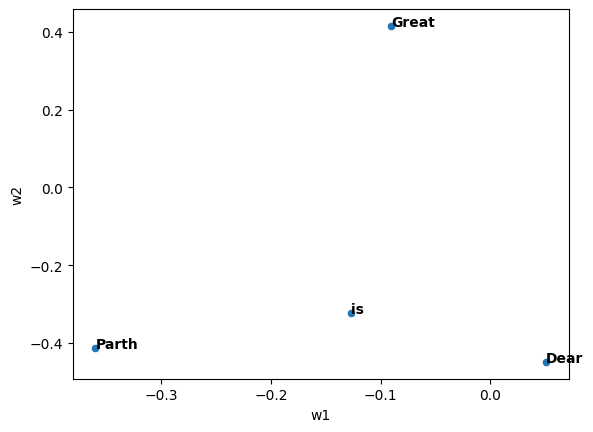

In [52]:

sns.scatterplot(data = df , x = 'w1', y = 'w2')

plt.text(df.w1[0], df.w2[0], df.token[0],
         horizontalalignment = 'left',
         size = 'medium',
         color = 'black',
         weight = 'semibold')



plt.text(df.w1[1], df.w2[1], df.token[1],
         horizontalalignment = 'left',
         size = 'medium',
         color = 'black',
         weight = 'semibold')


plt.text(df.w1[2], df.w2[2], df.token[2],
         horizontalalignment = 'left',
         size = 'medium',
         color = 'black',
         weight = 'semibold')



plt.text(df.w1[3], df.w2[3], df.token[3],
         horizontalalignment = 'left',
         size = 'medium',
         color = 'black',
         weight = 'semibold')


In [54]:
trainer = L.Trainer(max_epochs=100)

trainer.fit(Meramodel,train_dataloaders=meradata)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name         | Type             | Params | Mode 
----------------------------------------------------------
0 | loss         | CrossEntropyLoss | 0      | train
  | other params | n/a              | 16     | n/a  
----------------------------------------------------------
16        Trainable params
0         Non-trainable params
16        Total params
0.000     Total estimated model params size (MB)
/home/parthshr370/parthpython/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:424: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.
/home/parthshr370/parthpython/lib/python3.12/site-packages/lightning/pytorch/loops/fit_loop.py:298: The number of training batches (4) is smaller than the loggin

Epoch 0:   0%|          | 0/4 [00:00<?, ?it/s] 

IndexError: tensors used as indices must be long, int, byte or bool tensors